<a href="https://colab.research.google.com/github/minsuk-heo/tf2/blob/master/jupyter_notebooks/04.AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

# Auto Encoder
Using Dense layer, we will compress MNIST to 3d vector so we can visualize it. This is called Auto Encoder design.

In [3]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder1.png", width=500, height=250)

# Get MNIST Data

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [8]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# MNIST Preprocess

In [5]:
# we will use train data for auto encoder training
x_train = x_train.reshape(60000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

# Auto Encoder diagram

In [6]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder2.png", width=500, height=250)

# Modeling

In [7]:
# MNIST input 28 rows * 28 columns = 784 pixels
input_img = Input(shape=(784,))
# encoder
encoder1 = Dense(128, activation='sigmoid')(input_img)
encoder2 = Dense(3, activation='sigmoid')(encoder1)
# decoder
decoder1 = Dense(128, activation='sigmoid')(encoder2)
decoder2 = Dense(784, activation='sigmoid')(decoder1)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoder2)

2022-04-27 22:19:52.796721: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-04-27 22:19:52.834322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-27 22:19:52.834522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P1000 computeCapability: 6.1
coreClock: 1.5185GHz coreCount: 4 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 89.53GiB/s
2022-04-27 22:19:52.834646: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-04-27 22:19:52.848957: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-04-27 22:19:52.849142: I tensorflow/stream_executor/platform/d

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
  11/1875 [..............................] - ETA: 20s - loss: 0.2012

2022-04-27 22:22:48.130491: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2022-04-27 22:22:48.384427: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.1998 - val_loss: 0.1902
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1971 - val_loss: 0.1876
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1946 - val_loss: 0.1851
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1923 - val_loss: 0.1831
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1905 - val_loss: 0.1816
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1890 - val_loss: 0.1803
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1878 - val_loss: 0.1794
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1867 - val_loss: 0.1783
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1855 - val_loss: 0.1767
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1842 

In [16]:
# create encoder model
encoder = Model(inputs=input_img, outputs=encoder2)
# create decoder model
encoded_input = Input(shape=(3,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

In [17]:
# get latent vector for visualization
latent_vector = encoder.predict(x_test)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

# MNIST 3D Visualization

/tmp/ipykernel_8570/2881107680.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


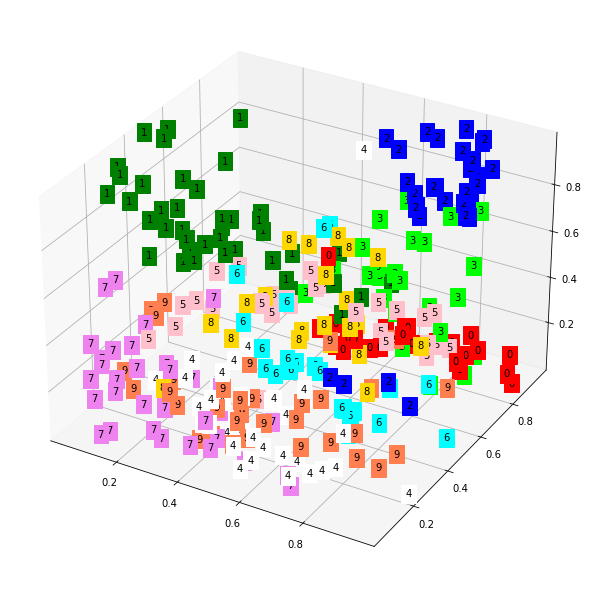

In [18]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

# Visualize Reconstructed Images

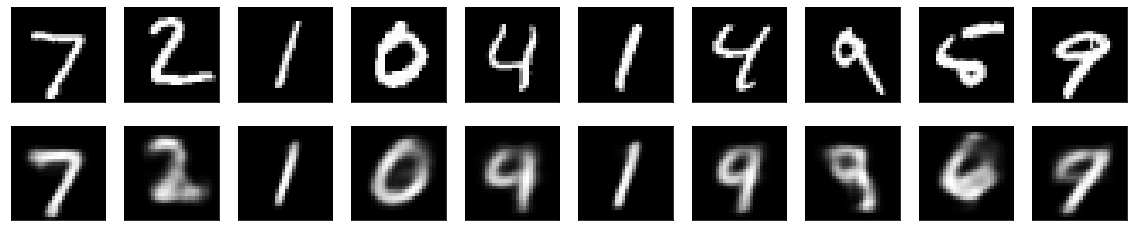

In [19]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()